<h1>View Main Dataset</h1>

In [24]:
import numpy as np
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

style.use('dark_background')

titanic_data = pd.read_csv("train.csv")
titanic_data = titanic_data.replace(("male", "female"), (0,1))
titanic_data = titanic_data.dropna()
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",0,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S


<AxesSubplot:title={'center':'Onboard'}, ylabel='Frequency'>

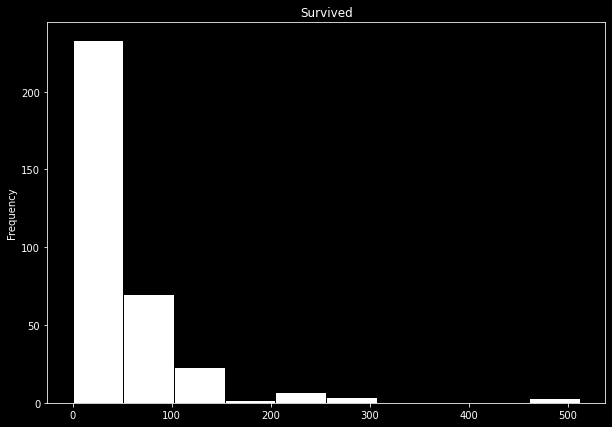

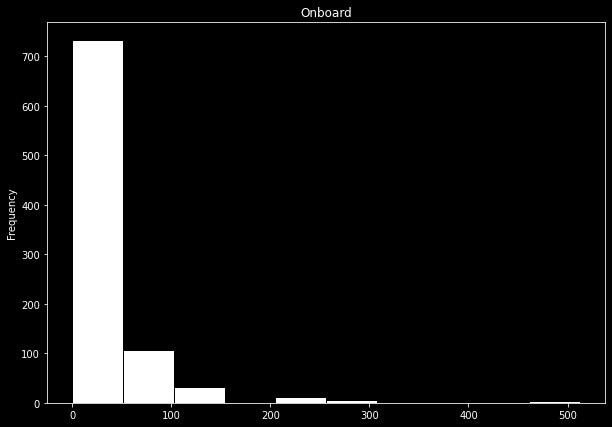

In [4]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
plot1 = plt.figure(1)
plt.title("Survived")
x.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))
plot2 = plt.figure(2)
plt.title("Onboard")
titanic_data.Fare.plot(kind = "hist", color = 'white', edgecolor='black', figsize=(10, 7))


In [20]:
x = titanic_data.loc[titanic_data['Survived'] == 1]
nan_count = len(x.index)
nan_count

342

In [30]:
f = titanic_data.columns.tolist()
f.pop(1)
f.pop(2)
f.pop(6)
f.pop(7)
f.pop(7)
print(f)
X = titanic_data[f]
Y = titanic_data.Survived

['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [31]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X,Y)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True  True False  True False False]
Feature Ranking: [5 1 1 3 1 2 4]


C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Rusab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
